In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt

from deep_continuation.dataset import DATAPATH

The datasets studied here were obtained witht the following commands:

    python3 deep_continuation/dataset.py --save 10000 --seed 555;
    python3 deep_continuation/dataset.py --save 10000 --seed 555 --rescale 8.86;
    python3 deep_continuation/dataset.py --save 10000 --seed 555 --rescale 8.86 --spurious;

In [5]:
pi = {}
pi['no_rescale'] = np.load(os.path.join(DATAPATH,"Pi_B1_10000_seed555_128_beta30.npy"))
pi['rescale'   ] = np.load(os.path.join(DATAPATH,"Pi_B1_10000_seed555_128_beta30_rescaled8.86.npy"))

sigma = {}
sigma['no_rescale'] = np.load(os.path.join(DATAPATH,"sigma_B1_10000_seed555_512_wmax20.npy"))
sigma['rescale'   ] = np.load(os.path.join(DATAPATH,"sigma_B1_10000_seed555_512_wmax20_rescaled8.86.npy"))

scale = np.load(os.path.join(DATAPATH,"scale_B1_10000_seed555_128_beta30_rescaled8.86.npy"))


Here are the difference in statistics

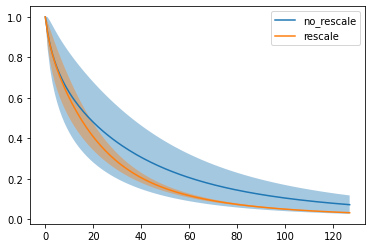

In [3]:
x = np.arange(128)
for key, dataset in pi.items():
    avg = dataset.mean(axis=0)
    std = dataset.std(axis=0)
    
    plt.plot(avg, label=key)
    plt.fill_between(x, avg-std, avg+std, alpha=0.4)
plt.legend()
plt.show()

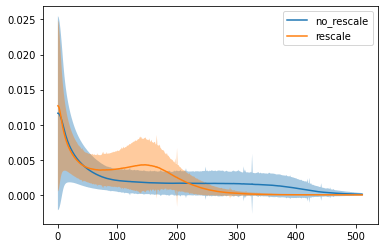

In [4]:
x = np.arange(512)
for key, dataset in sigma.items():
    avg = dataset.mean(axis=0)
    std = dataset.std(axis=0)
    
    plt.plot(avg, label=key)
    plt.fill_between(x, avg-std, avg+std, alpha=0.4)
plt.legend()
plt.show()

Attempt to substract a baseline

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


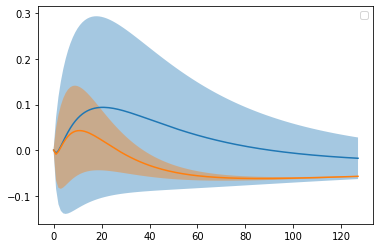

In [5]:
x = np.arange(128)
f = lambda y: y - 1/(x/(120*np.pi/30)+1) 

for key, dataset in pi.items():
    avg = dataset.mean(axis=0)
    std = dataset.std(axis=0)
    
    plt.plot(x, f(avg))
    plt.fill_between(x, f(avg-std), f(avg+std), alpha=0.4)
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


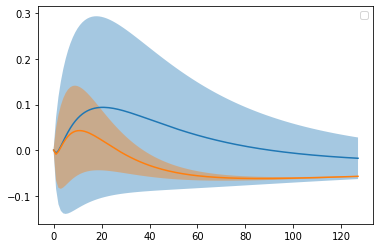

In [6]:
x = np.arange(128)
f = lambda y: y - 1/(x/(120*np.pi/30)+1) 

for key, dataset in pi.items():
    avg = dataset.mean(axis=0)
    std = dataset.std(axis=0)
    
    plt.plot(x, f(avg))
    plt.fill_between(x, f(avg-std), f(avg+std), alpha=0.4)
plt.legend()
plt.show()

In [7]:
from scipy.optimize import curve_fit

def tail(x, p):
    return 1/(p*x+1)

def fit_tail(Pi, n=30):
    assert n<=128
    wn = np.arange(n)
    popt, pcov = curve_fit(tail, wn, Pi[128-n:], p0=1/(120*np.pi/30))
    return popt

pfit = {}
for key, dataset in pi.items():
    pfit[key] = np.array([fit_tail(y) for y in dataset]).squeeze()
    print(f"{key} fit mean={pfit[key].mean()}, std={pfit[key].std()}")


no_rescale fit mean=42.17752562958354, std=262.48449212474156
rescale fit mean=7.47050010784037, std=0.4841929572735135


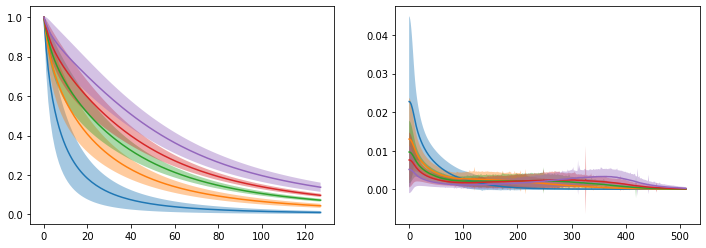

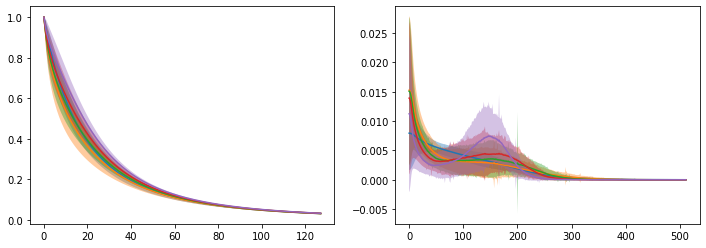

In [12]:
for key in sigma:
    split_by = scale #split_by[key]

    bounds = [
        np.quantile(split_by, 0),
        np.quantile(split_by, 0.2),
        np.quantile(split_by, 0.4),
        np.quantile(split_by, 0.6),
        np.quantile(split_by, 0.8),
        np.quantile(split_by, 1)
    ]

    
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    for i in range(len(bounds)-1):
        lb = bounds[i]
        ub = bounds[i+1]
        mask = np.logical_and(lb<split_by, split_by<ub)
        # print(f"{mask.sum():5.0f} between {lb:.2f} and {ub:.2f}")
        
        y = pi[key][mask,:]
        avg = pi[key][mask].mean(0)
        std = pi[key][mask].std(0)
        x=np.arange(128)
        ax[0].plot(x, avg)
        ax[0].fill_between(x, avg-std, avg+std, alpha=0.4)

        y = sigma[key][mask,:]
        avg = sigma[key][mask].mean(0)
        std = sigma[key][mask].std(0)
        x=np.arange(512)
        ax[1].plot(x, avg)
        ax[1].fill_between(x, avg-std, avg+std, alpha=0.4)
    plt.show()